In [1]:
# SET UP
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")
# change the default to He Initialization

In [3]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',distribution='uniform')
# we want He initialization base on fan_avg, not fan_in
keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)


In [4]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [5]:
[m for m in dir(keras.activations) ]

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [6]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [7]:
#  train a neural network on Fashion MNIST using the Leaky ReLU

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),    # activation
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),    # activation
    keras.layers.Dense(10, activation="softmax")
])
# put the activation after the layer you want to apply to

In [10]:
model.compile(loss="sparse_categorical_crossentropy",  # multiclassifier
              optimizer=keras.optimizers.SGD(lr=1e-3), # 0.001, start from a very small learning rate
              metrics=["accuracy"])

In [11]:
hitory = model.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid))
# according to the loss, there is definately room for improvement

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7658
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6816 - accuracy: 0.7720 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8198
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.5157 - val_accuracy:

In [12]:
# try PReLU

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),    # activation
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),    # activation
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
# the compile part is same

In [15]:
history_one = model.fit(X_train, y_train, epochs =10,
                       validation_data=(X_valid, y_valid))
# there is also room for improvement

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7184
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7632
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6564 - val_accuracy: 0.7884
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6331 - accuracy: 0.7910 - val_loss: 0.6003 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5917 - accuracy: 0.8056 - val_loss: 0.5656 - val_accuracy: 0.8184
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5618 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5390 - accuracy: 0.8206 - val_loss: 0.5196 - val_accuracy:

In [16]:
# Try SELU this time
# Using SELU, even 1000 layer DNN preserve roughly 0 mean and std 1,
# avoiding the exploding/vanishing gradients problem

In [17]:
# Fashion MNIST with 100 hidden layers, using the SELU activation function
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))

In [19]:
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))
# add many layers

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [21]:
# !!!!!!  scale the inputs to mean 0 and standard deviation 1
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
# Use these two for input normalization
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [22]:
history_two = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

# It is really slow

Epoch 1/5
1719/1719 [==============================] - 42s 25ms/step - loss: 1.3655 - accuracy: 0.4703 - val_loss: 0.8430 - val_accuracy: 0.7270
Epoch 2/5
1719/1719 [==============================] - 41s 24ms/step - loss: 0.7593 - accuracy: 0.7310 - val_loss: 0.6394 - val_accuracy: 0.7784
Epoch 3/5
1719/1719 [==============================] - 41s 24ms/step - loss: 0.6224 - accuracy: 0.7792 - val_loss: 0.7451 - val_accuracy: 0.6906
Epoch 4/5
1719/1719 [==============================] - 40s 23ms/step - loss: 0.5510 - accuracy: 0.8069 - val_loss: 0.4976 - val_accuracy: 0.8286
Epoch 5/5
1719/1719 [==============================] - 40s 24ms/step - loss: 0.5242 - accuracy: 0.8198 - val_loss: 0.5051 - val_accuracy: 0.8240


In [23]:
# now that's compare to ReLU
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))
# See what happen if we also provide many layers for ReLU


In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [26]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))
#  suffered from the vanishing/exploding gradients problem

Epoch 1/5
1719/1719 [==============================] - 16s 9ms/step - loss: 1.7943 - accuracy: 0.2667 - val_loss: 1.3639 - val_accuracy: 0.3538
Epoch 2/5
1719/1719 [==============================] - 17s 10ms/step - loss: 1.1514 - accuracy: 0.5130 - val_loss: 0.9178 - val_accuracy: 0.6464
Epoch 3/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.9737 - accuracy: 0.6063 - val_loss: 0.8336 - val_accuracy: 0.6830
Epoch 4/5
1719/1719 [==============================] - 17s 10ms/step - loss: 0.8294 - accuracy: 0.6710 - val_loss: 0.7792 - val_accuracy: 0.6954
Epoch 5/5
1719/1719 [==============================] - 20s 11ms/step - loss: 0.8674 - accuracy: 0.6598 - val_loss: 0.8817 - val_accuracy: 0.6522


In [27]:
# Batch Normalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),  # Apply as first layer after flatten
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),  # After activation function
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),  # After activation function
    keras.layers.Dense(10, activation="softmax")
])

In [28]:
model.summary()
# adds 4 parameters per input, 3136 = 4*784
# (3136 + 1200 + 400)/2 = 2368, which is non-trainable
# The last two parameters, μ and σ, are the moving averages; they are not affected by backpropagation

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_210 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_211 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_212 (Dense)            (None, 10)               

In [29]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]
# first two trainable
# last two non-trainable

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [30]:
#bn1.updates is deprecated
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [31]:
history_three = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8750 - accuracy: 0.7124 - val_loss: 0.5525 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5753 - accuracy: 0.8029 - val_loss: 0.4724 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5189 - accuracy: 0.8205 - val_loss: 0.4375 - val_accuracy: 0.8552
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4827 - accuracy: 0.8323 - val_loss: 0.4151 - val_accuracy: 0.8594
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4565 - accuracy: 0.8405 - val_loss: 0.3996 - val_accuracy: 0.8636
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4397 - accuracy: 0.8475 - val_loss: 0.3866 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4242 - accuracy: 0.8513 - val_loss: 0.3762 - val_accuracy:

In [32]:
# Add BN layer before activation function
# remove the activation function from the hidden layers and add them as separate layers after the BN layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [34]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0317 - accuracy: 0.6757 - val_loss: 0.6767 - val_accuracy: 0.7816
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6790 - accuracy: 0.7792 - val_loss: 0.5566 - val_accuracy: 0.8180
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5960 - accuracy: 0.8038 - val_loss: 0.5007 - val_accuracy: 0.8360
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5447 - accuracy: 0.8193 - val_loss: 0.4666 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5109 - accuracy: 0.8279 - val_loss: 0.4434 - val_accuracy: 0.8536
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4898 - accuracy: 0.8337 - val_loss: 0.4263 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4712 - accuracy: 0.8397 - val_loss: 0.4131 - val_accuracy:

In [35]:
# Gradient Clipping

In [36]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer)

In [37]:
# Reusing Pretrained Layers

In [38]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6] # y except sandals or shirts
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7, went from 10 classes to 8 classes
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [39]:
# X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).
# X_train_B: a much smaller training set of just the first 200 images of sandals or shirts. 


In [40]:
X_train_A.shape

(43986, 28, 28)

In [41]:
X_train_B.shape

(200, 28, 28)

In [42]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [43]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [44]:
tf.random.set_seed(42)
np.random.seed(42)

In [45]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):  # 5 hideen layers
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [46]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [47]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5927 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8667
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8894 - val_loss: 0.3014 - val_accuracy: 0.8994
Epoch 4/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2973 - accuracy: 0.8974 - val_loss: 0.2893 - val_accuracy: 0.9016
Epoch 5/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9020 - val_loss: 0.2774 - val_accuracy: 0.9063
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9062 - val_loss: 0.2734 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2641 - accuracy: 0.9093 - val_loss: 0.2722 - val_accuracy:

In [48]:
# save model A
model_A.save("my_model_A.h5")

In [49]:
# train a new model for this task (let’s call it model B) with the same architecture as model A
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))  # Last chapter point out the advantage of SELU
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [50]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [51]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 28ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 8ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 9ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [=================

In [52]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_222 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_223 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_224 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_225 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_226 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_227 (Dense)            (None, 1)                

In [53]:
# load model A and create a new model based on that model’s layers
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [54]:
# avoid affecting model A
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())


In [55]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd",
metrics=["accuracy"])


In [56]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))
# train the model for a few epochs, then unfreeze the reused layers 
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 25ms/step - loss: 0.4656 - accuracy: 0.7500 - val_loss: 0.3568 - val_accuracy: 0.8469
Epoch 2/4
7/7 [==============================] - 0s 7ms/step - loss: 0.2755 - accuracy: 0.9400 - val_loss: 0.2351 - val_accuracy: 0.9422
Epoch 3/4
7/7 [==============================] - 0s 7ms/step - loss: 0.1825 - accuracy: 0.9650 - val_loss: 0.1774 - val_accuracy: 0.9655
Epoch 4/4
7/7 [==============================] - 0s 7ms/step - loss: 0.1367 - accuracy: 0.9800 - val_loss: 0.1447 - val_accuracy: 0.9828
Epoch 1/16
7/7 [==============================] - 0s 27ms/step - loss: 0.1119 - accuracy: 0.9900 - val_loss: 0.1284 - val_accuracy: 0.9848
Epoch 2/16
7/7 [==============================] - 0s 7ms/step - loss: 0.0975 - accuracy: 0.9950 - val_loss: 0.1153 - val_accuracy: 0.9878
Epoch 3/16
7/7 [==============================] - 0s 8ms/step - loss: 0.0859 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 0.9888
Epoch 4/16
7/7 [====================

In [57]:
#　evaluate test set
# oroginal model B
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [58]:
# transfer learning model
model_B_on_A.evaluate(X_test_B, y_test_B)
# improve a lot

63/63 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9940


[0.05228932201862335, 0.9940000176429749]

In [59]:
(100 - 97.05) / (100 - 99.35)
# the improvement

4.538461538461503

In [60]:
# Faster Optimizers

In [61]:
# Momentum optimization
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [62]:
# Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [63]:
# AdaGrad
optimizer = keras.optimizers.Adagrad(lr=0.001)

In [64]:
# RMSProp
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

In [65]:
# Adam Optimizer
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [66]:
# Adamax Optimization
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

In [67]:
# Nadam Optimization
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [68]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [70]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4855 - accuracy: 0.8304 - val_loss: 0.4029 - val_accuracy: 0.8592
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3782 - accuracy: 0.8657 - val_loss: 0.3715 - val_accuracy: 0.8728
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3459 - accuracy: 0.8770 - val_loss: 0.3750 - val_accuracy: 0.8752
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3251 - accuracy: 0.8827 - val_loss: 0.3502 - val_accuracy: 0.8796
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3102 - accuracy: 0.8889 - val_loss: 0.3448 - val_accuracy: 0.8778
Epoch 6/25
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2967 - accuracy: 0.8933 - val_loss: 0.3413 - val_accuracy: 0.8828
Epoch 7/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2868 - accuracy: 0.8973 - val_loss: 0.3357 - val_accuracy:

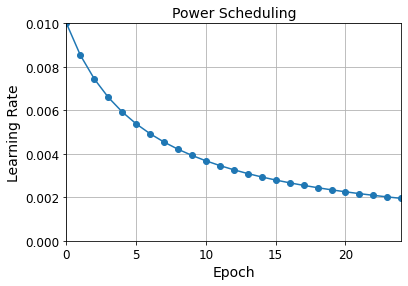

In [71]:
import math

learning_rate = 0.01
decay = 1e-4    # power scheduling
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [72]:
# exponential scheduling

In [73]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [74]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [75]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [76]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8480 - accuracy: 0.7550 - val_loss: 0.9785 - val_accuracy: 0.7528
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6713 - accuracy: 0.7948 - val_loss: 0.6585 - val_accuracy: 0.8264
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6148 - accuracy: 0.8125 - val_loss: 0.8588 - val_accuracy: 0.7736
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5350 - accuracy: 0.8324 - val_loss: 0.4969 - val_accuracy: 0.8446
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5106 - accuracy: 0.8411 - val_loss: 0.5831 - val_accuracy: 0.8470
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4513 - accuracy: 0.8571 - val_loss: 0.5781 - val_accuracy: 0.8538
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4119 - accuracy: 0.8675 - val_loss: 0.5293 - val_accuracy:

In [77]:
# The schedule function can take the current learning rate as a second argument:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [78]:
# Piecewise Constant Scheduling
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [79]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8839 - accuracy: 0.7489 - val_loss: 0.8820 - val_accuracy: 0.7236
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8297 - accuracy: 0.7622 - val_loss: 1.2858 - val_accuracy: 0.6668
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8822 - accuracy: 0.7533 - val_loss: 1.6342 - val_accuracy: 0.6094
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8347 - accuracy: 0.7595 - val_loss: 0.6871 - val_accuracy: 0.8082
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9767 - accuracy: 0.7133 - val_loss: 1.5006 - val_accuracy: 0.5644
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7129 - accuracy: 0.7588 - val_loss: 0.7003 - val_accuracy: 0.8112
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5761 - accuracy: 0.8209 - val_loss: 0.6265 - val_accuracy:

In [80]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [81]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9282 - accuracy: 0.7330 - val_loss: 1.0504 - val_accuracy: 0.6664
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9055 - accuracy: 0.7077 - val_loss: 0.8664 - val_accuracy: 0.7178
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9217 - accuracy: 0.6941 - val_loss: 1.0393 - val_accuracy: 0.6920
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0725 - accuracy: 0.6492 - val_loss: 1.1998 - val_accuracy: 0.5408
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0555 - accuracy: 0.6142 - val_loss: 0.9980 - val_accuracy: 0.6174
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8560 - accuracy: 0.6482 - val_loss: 0.8538 - val_accuracy: 0.6650
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8167 - accuracy: 0.6624 - val_loss: 0.9097 - val_accuracy:

In [82]:
tf.random.set_seed(42)
np.random.seed(42)

In [83]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [84]:
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

In [85]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5921 - accuracy: 0.8083 - val_loss: 0.4691 - val_accuracy: 0.8518
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5030 - accuracy: 0.8387 - val_loss: 0.6181 - val_accuracy: 0.8346
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5166 - accuracy: 0.8421 - val_loss: 0.5722 - val_accuracy: 0.8498
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4964 - accuracy: 0.8504 - val_loss: 0.4432 - val_accuracy: 0.8576
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5157 - accuracy: 0.8485 - val_loss: 0.5207 - val_accuracy: 0.8528
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5048 - accuracy: 0.8550 - val_loss: 0.6121 - val_accuracy: 0.8606
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5345 - accuracy: 0.8550 - val_loss: 0.6298 - val_accuracy:

In [86]:
# tf.keras schedulers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [87]:
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

In [88]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4894 - accuracy: 0.8276 - val_loss: 0.4095 - val_accuracy: 0.8606
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3820 - accuracy: 0.8653 - val_loss: 0.3741 - val_accuracy: 0.8690
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3487 - accuracy: 0.8767 - val_loss: 0.3726 - val_accuracy: 0.8688
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3265 - accuracy: 0.8836 - val_loss: 0.3493 - val_accuracy: 0.8800
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3105 - accuracy: 0.8895 - val_loss: 0.3430 - val_accuracy: 0.8790
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8952 - val_loss: 0.3412 - val_accuracy: 0.8812
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2855 - accuracy: 0.8987 - val_loss: 0.3353 - val_accuracy:

In [89]:
# For piecewise constant scheduling
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

In [90]:
# 1Cycle scheduling
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [91]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [92]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [93]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5203 - accuracy: 0.8173 - val_loss: 0.4169 - val_accuracy: 0.8582
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3974 - accuracy: 0.8586 - val_loss: 0.3778 - val_accuracy: 0.8698
Epoch 3/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3617 - accuracy: 0.8713 - val_loss: 0.4036 - val_accuracy: 0.8582
Epoch 4/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3386 - accuracy: 0.8774 - val_loss: 0.3508 - val_accuracy: 0.8764
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3195 - accuracy: 0.8848 - val_loss: 0.3474 - val_accuracy: 0.8734
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2979 - accuracy: 0.8913 - val_loss: 0.3476 - val_accuracy: 0.8786
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2858 - accuracy: 0.8950 - val_loss: 0.3914 - val_accuracy:

In [94]:
# Avoiding Overfitting Through Regularization
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [95]:
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
activation="elu",
kernel_initializer="he_normal",
kernel_regularizer=keras.regularizers.l2(0.01))

In [96]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
RegularizedDense(300),
RegularizedDense(100),
RegularizedDense(10, activation="softmax",
kernel_initializer="glorot_uniform")
])

In [97]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 4ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [98]:
# dropout
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dropout(rate=0.2),
keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
keras.layers.Dropout(rate=0.2),
keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
keras.layers.Dropout(rate=0.2),
keras.layers.Dense(10, activation="softmax")
])

In [99]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5597 - accuracy: 0.8059 - val_loss: 0.3672 - val_accuracy: 0.8652
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4229 - accuracy: 0.8453 - val_loss: 0.3460 - val_accuracy: 0.8698


In [100]:
# Alpha Dropout
tf.random.set_seed(42)
np.random.seed(42)

In [101]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)    # self-normalized?
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6654 - accuracy: 0.7599 - val_loss: 0.5935 - val_accuracy: 0.8420
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5608 - accuracy: 0.7929 - val_loss: 0.5566 - val_accuracy: 0.8398
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5284 - accuracy: 0.8056 - val_loss: 0.4832 - val_accuracy: 0.8584
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5073 - accuracy: 0.8118 - val_loss: 0.4605 - val_accuracy: 0.8600
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4924 - accuracy: 0.8179 - val_loss: 0.4584 - val_accuracy: 0.8562
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4871 - accuracy: 0.8184 - val_loss: 0.4739 - val_accuracy: 0.8598
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4714 - accuracy: 0.8244 - val_loss: 0.4708 - val_accuracy:

In [102]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8680


[0.4313259422779083, 0.8679999709129333]

In [103]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 3s 1ms/step - loss: 0.3194 - accuracy: 0.8903


[0.31936410069465637, 0.8902727365493774]

In [104]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 7s 4ms/step - loss: 0.4174 - accuracy: 0.8452


In [105]:
# MC Dropout
tf.random.set_seed(42)
np.random.seed(42)

In [106]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)
# setting training=True to
# ensure that the Dropout layer is active, and stack the predictions

In [107]:
np.round(model.predict(X_test_scaled[:1]), 2)
# dropout off

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [108]:
np.round(y_probas[:, :1], 2)
# This is stacked
# dropout activated

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.24, 0.  , 0.17, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.83, 0.  , 0.17]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.  , 0.  , 0.7 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.05, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.13, 0.  , 0.67]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.4 , 0.  , 0.6 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.28, 0.  , 0.2 , 0.  , 0.51]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.46, 0.  , 0.54]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.69, 0.  , 0.04, 0.  , 0.27]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.06, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.06, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.41, 0.  , 0.  , 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 0.06, 0.  , 0.18]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.03, 0.  , 0

In [109]:
np.round(y_proba[:1], 2)
# average the first dimension
# still thinks belong to class 9

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.1 , 0.  , 0.69]],
      dtype=float32)

In [112]:
len(y_probas)

100

In [113]:
# standard deviation of the probability estimates
y_std = y_probas.std(axis=0)

In [114]:
np.round(y_std[:1], 2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.17, 0.  , 0.28]],
      dtype=float32)

In [115]:

y_pred = np.argmax(y_proba, axis=1)
accuracy = np.sum(y_pred == y_test) / len(y_test)


In [116]:
accuracy
# actualliy boosted

0.8713

In [117]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)


In [118]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [119]:
# Max norm
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [120]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

In [121]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])

In [122]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4744 - accuracy: 0.8335 - val_loss: 0.3619 - val_accuracy: 0.8664
Epoch 2/2
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3545 - accuracy: 0.8712 - val_loss: 0.3808 - val_accuracy: 0.8622
